# TASK 4

#### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 13.8 MB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
data= pd.read_csv('twitter_training.csv')

In [17]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [19]:
col_names=['ID','Entity','Sentiments','Contest']
df=pd.read_csv('twitter_training.csv', names=col_names)

In [21]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [23]:
df.shape

(74682, 4)

In [25]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [27]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [29]:
df.dropna(axis=0,inplace=True)

In [31]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [33]:
df.duplicated().sum()

2340

In [35]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [37]:
df.shape

(71656, 4)

In [39]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

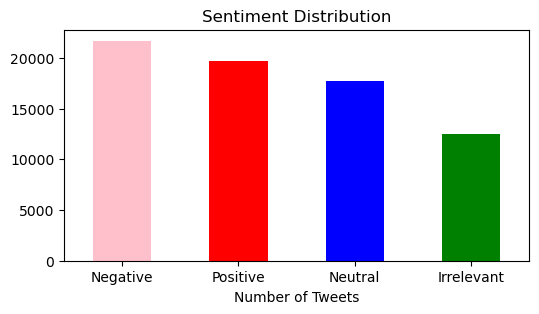

In [41]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['pink','red','blue','green'])
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [43]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

Sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

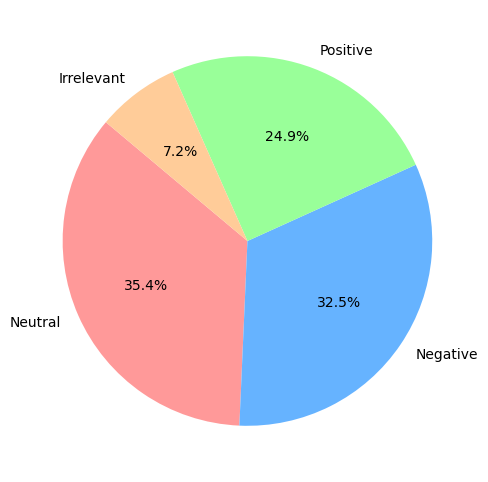

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.show()
